In [30]:
'''import package'''
import numpy as np 
import matplotlib.pyplot as pt
from matplotlib.pyplot import style
style.use('ggplot')
import scipy.optimize as lm
import random as r
r.seed(2020)

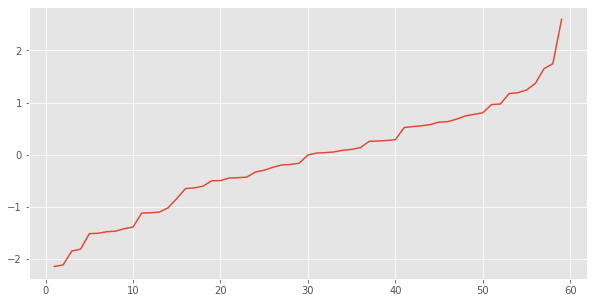

In [59]:
x = np.array(range(1,60))
y = np.random.normal(size=len(x))
y = np.sort(y)
pt.figure(figsize=(10,5))
pt.plot(x,y)

In [57]:
line = lambda p1 , p2 , x : p1 + p2 * x[:]
exp = lambda p1 , p2 , x : p1 * np.exp( p2*x[:] )
logit = lambda  p1 , p2 , x : 1.0 / ( 1 + np.exp(-line(p1,p2,x[:]) ))

In [33]:
class error :
    def mline(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-line(p1,p2,x),2))  
    
    def mexp(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-exp(p1,p2,x),2))
    
    def mlogit(self,p,x,y):
        p1 , p2 = p
        return np.sum(np.power(y-logit(p1,p2,x),2))            

In [34]:
b = error()
p = [0,0]
b.mline(p,x,y)

32.8863130498797

(-0.07787183985373138, 0.017292770630025656)

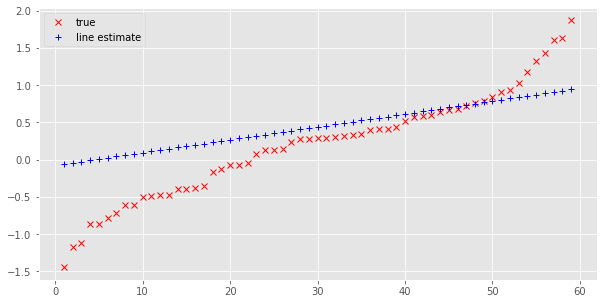

In [49]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mline,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , line(p1,p2,x),'b+' , label = 'line estimate')
pt.legend()

p1 , p2

In [41]:
e.mline(p,x,y) , e.mexp(p,x,y) , e.mlogit(p,x,y)

(68110.17153449239, 32.8863130498797, 65.75455584812954)

(0.0653006752968828, 0.05377068686780082)

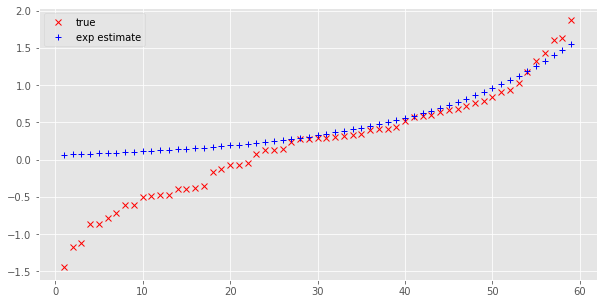

In [51]:
e = error()
p = [0,0]
params_line = lm.least_squares(e.mexp,p,args=(x,y)).x
p1 , p2 = params_line
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , exp(p1,p2,x),'b+' , label = 'exp estimate')
pt.legend()

p1 , p2

(-0.38158224845547956, 0.019301157218516225)

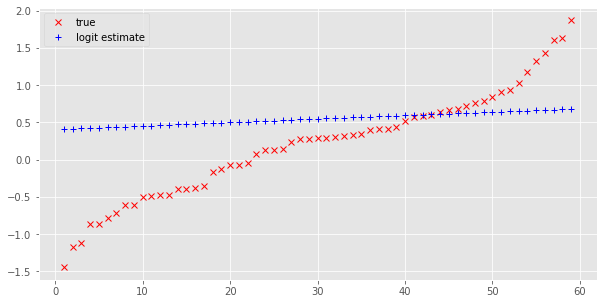

In [58]:
e = error()
p = [0,0]
params = lm.least_squares(e.mlogit,p,args=(x,y)).x
p1 , p2 = params
pt.figure(figsize=(10,5))
pt.plot(x , y , 'rx' , label = 'true')
pt.plot(x , logit(p1,p2,x),'b+' , label = 'logit estimate')
pt.legend()

p1 , p2